In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import boxcox,yeojohnson_normmax,boxcox_normmax,yeojohnson
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler, MinMaxScaler, power_transform, QuantileTransformer

### Load the data

In [2]:
df = pd.read_csv("Ajay_Final.csv")
df.head()

,Label,Word Density,Review Length(No. of Words),Ratio of Positive Words,Parts-of-speech Ratio,SpamHitScore,Sentiment Score,Review Gap,User Tenure,Time of Review,Rating Deviation,Review Count,Rating Entropy
0,-1,5.039216,50,0.029703,0.019608,27,0.75,50.333333,151,742.000000,0.821208,4,0.562336
1,1,5.410714,279,0.012522,0.086505,180,0.71,10.500000,21,1428.666667,0.967829,3,1.098613
2,1,5.450980,152,0.013115,0.078431,102,0.74,16.714286,117,947.000000,1.005038,8,1.320889
3,1,5.372727,219,0.015945,0.105727,125,0.64,49.000000,245,719.166667,0.849313,6,1.242454
4,1,5.161765,135,0.022222,0.095588,74,0.65,37.000000,333,1345.400000,1.153989,10,0.801819


## BOXPLOT for complete data

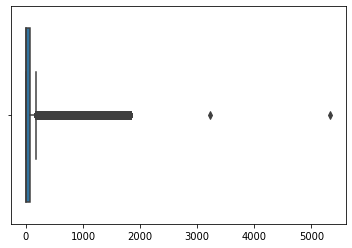

In [3]:
sn.boxplot(df)

## BOXPLOTS for studying outliers for every feature individually

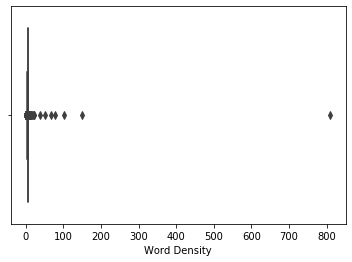

In [4]:
sn.boxplot(df['Word Density']) 

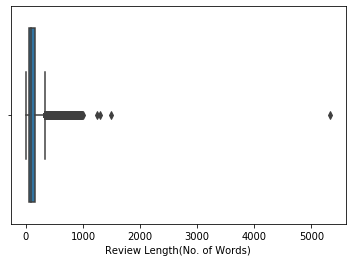

In [5]:
sn.boxplot(df['Review Length(No. of Words)']) 

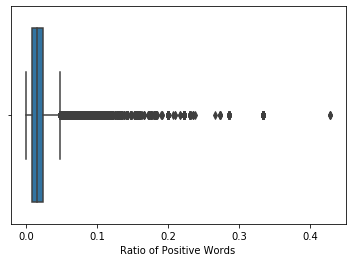

In [6]:
sn.boxplot(df['Ratio of Positive Words']) 

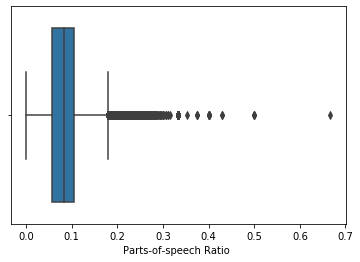

In [7]:
sn.boxplot(df['Parts-of-speech Ratio ']) 

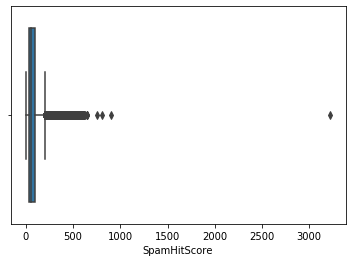

In [8]:
sn.boxplot(df['SpamHitScore']) 

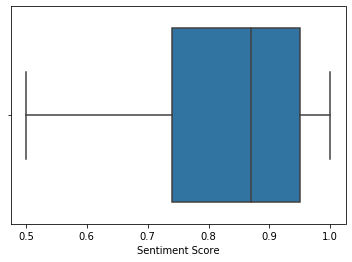

In [9]:
sn.boxplot(df['Sentiment Score']) 

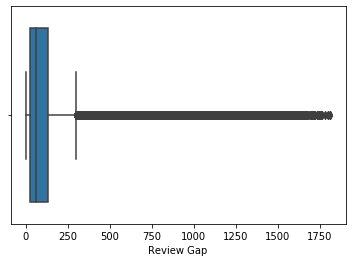

In [10]:
sn.boxplot(df['Review Gap']) 

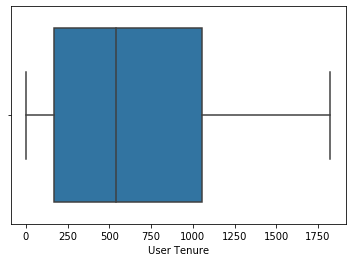

In [11]:
sn.boxplot(df['User Tenure']) 

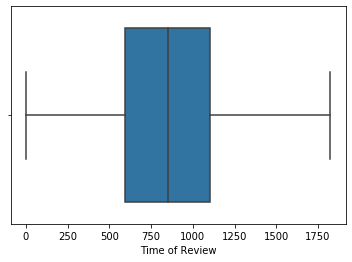

In [12]:
sn.boxplot(df['Time of Review']) 

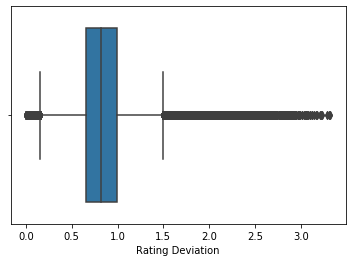

In [13]:
sn.boxplot(df['Rating Deviation']) 

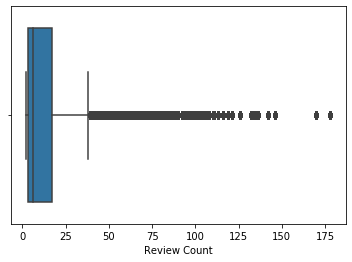

In [14]:
sn.boxplot(df['Review Count']) 

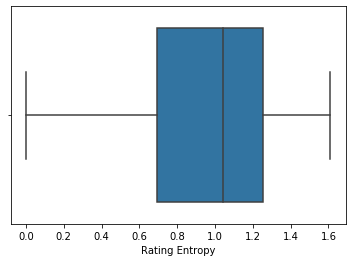

In [15]:
sn.boxplot(df['Rating Entropy']) 

In [16]:
df_final=pd.DataFrame() ## final dataframe for normally distributed processed features

In [17]:
df_out = df.copy() ## creating copy for performing operations in order to keep original df intact

### Taking log before outlier removal to help retain novel outlier points and get better symmetry in curve. Did not take log for 'Sentiment score' as it is highly negatively skewed and is not ideally recommended. 

In [18]:
df_out = np.log10(df[['Word Density','Review Length(No. of Words)','Ratio of Positive Words','Parts-of-speech Ratio ',
                      'SpamHitScore','Review Gap','User Tenure','Time of Review','Rating Deviation','Review Count','Rating Entropy']])
df_out['Sentiment Score'] = df['Sentiment Score']
#df_out['Label'] = df['Label']
print(df_out)

        Word Density  Review Length(No. of Words)  Ratio of Positive Words  \
0           0.702363                     1.698970                -1.527200   
1           0.733255                     2.445604                -1.902314   
2           0.736475                     2.181844                -1.882240   
3           0.730195                     2.340444                -1.797366   
4           0.712798                     2.130334                -1.653213   
...              ...                          ...                      ...   
384141      0.714210                     2.348305                -2.349278   
384142      0.723104                     1.681241                -1.384712   
384143      0.731622                     2.161368                -1.986772   
384144      0.741031                     1.763428                -1.767156   
384145      0.656335                     1.880814                -1.883661   

        Parts-of-speech Ratio   SpamHitScore  Review Gap  User 

C:\Users\kajal.singh01\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


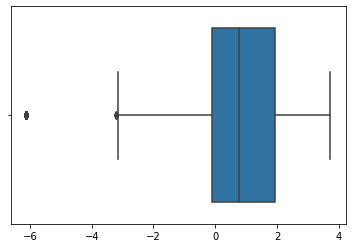

In [19]:
sn.boxplot(df_out)

### Getting the Interquartile range for outlier removal. It's the same technique that boxplot operates on.

In [20]:
Q1 = df_out.quantile(0.25)
Q3 = df_out.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Word Density                   0.033566
Review Length(No. of Words)    0.525585
Ratio of Positive Words        0.459729
Parts-of-speech Ratio          0.269910
SpamHitScore                   0.518514
Review Gap                     0.744907
User Tenure                    0.799176
Time of Review                 0.271158
Rating Deviation               0.179850
Review Count                   0.753328
Rating Entropy                 0.257985
Sentiment Score                0.210000
dtype: float64


### Removal of outliers from the data.

In [21]:
df_out = df_out[~((df_out < (Q1 - 1.5 * IQR)) |(df_out > (Q3 + 1.5 * IQR))).any(axis=1)]
df_out.shape

(248559, 12)

## BOXPLOT after removal of outliers from dataset

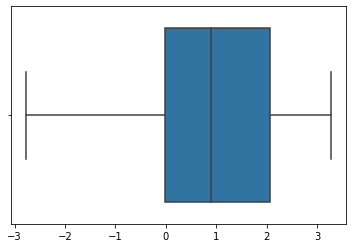

In [22]:
sn.boxplot(df_out)

### Till this step, we have done log transformation on 11 columns and removed the outliers from complete data. We now will explore each feature one by one.

In [23]:
# Declare qt - Transform features using quantiles information. It transforms the features to follow a normal distribution.
qt = QuantileTransformer(output_distribution='normal')

## 1. Review Gap

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is 0.15 which falls in normal range i.e. -0.5 to 0.5

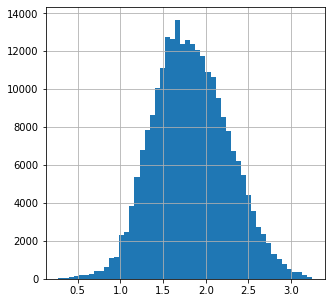

In [24]:
df_out['Review Gap'].hist(figsize=(5,5),bins=50)

In [25]:
df_out['Review Gap'].skew() ## normal distribution

0.1572906637976707

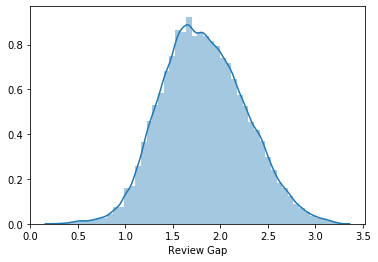

In [26]:
sn.distplot(df_out['Review Gap'])

## 2. Word Density

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is 0.01 which falls in normal range i.e. -0.5 to 0.5

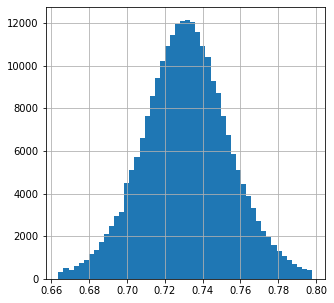

In [27]:
df_out['Word Density'].hist(figsize=(5,5),bins=50)

In [28]:
df_out['Word Density'].skew() 

0.01942087470435163

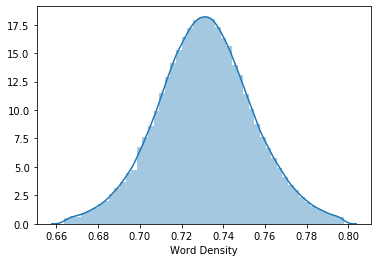

In [29]:
sn.distplot(df_out['Word Density'])

## 3. Review Length(No. of Words)

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is -0.15 which falls in normal range i.e. -0.5 to 0.5

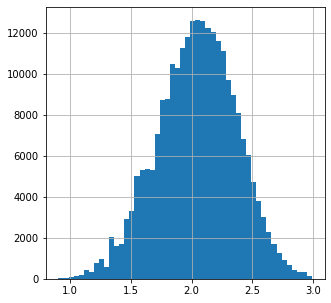

In [30]:
df_out['Review Length(No. of Words)'].hist(figsize=(5,5),bins=50)

In [31]:
df_out['Review Length(No. of Words)'].skew()

-0.15775682296926968

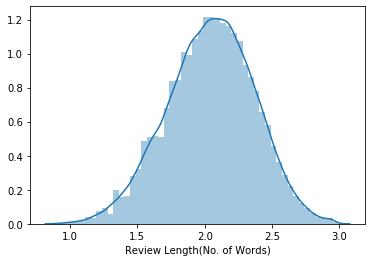

In [32]:
sn.distplot(df_out['Review Length(No. of Words)'])

## 4. Ratio of Positive Words

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is -0.26 which falls in normal range i.e. -0.5 to 0.5

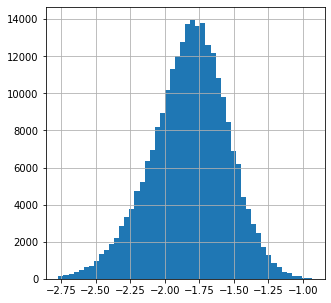

In [33]:
df_out['Ratio of Positive Words'].hist(figsize=(5,5),bins=50)

In [34]:
df_out['Ratio of Positive Words'].skew()

-0.2626698882357148

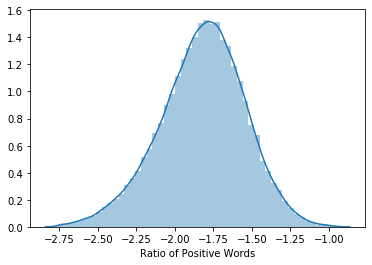

In [35]:
sn.distplot(df_out['Ratio of Positive Words'])

## 5. Parts-of-speech Ratio

### Data is not symmetrical for this feature with log transformation and outlier removal itself. Initial skew value is -0.71 which is negatively skewed. First we perform normalization of data using Min-max scaler and then perform power transformation on that. We can see the resultant skew value is -0.04 which falls in normal range i.e. -0.5 to 0.5. Hence the data is normal now

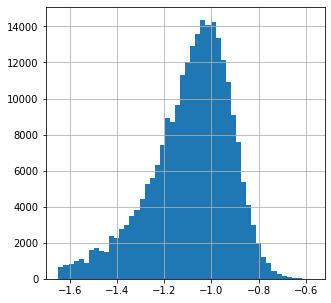

In [36]:
df_out['Parts-of-speech Ratio '].hist(figsize=(5,5),bins=50)

In [37]:
df_out['Parts-of-speech Ratio '].skew()

-0.7123976567467165

In [38]:
scale = MinMaxScaler()
POS = scale.fit(df_out[['Parts-of-speech Ratio ']])
POS_scaled = POS.transform(df_out[['Parts-of-speech Ratio ']])
df_out['POS_scaled'] = POS_scaled

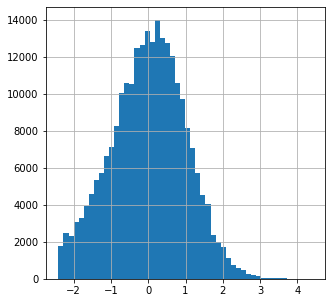

In [39]:
sqrt_transformed1 = power_transform(df_out[['POS_scaled']], method='yeo-johnson')
df_out['transform_POSRatio'] = sqrt_transformed1
df_out['transform_POSRatio'].hist(figsize=(5,5),bins=50)

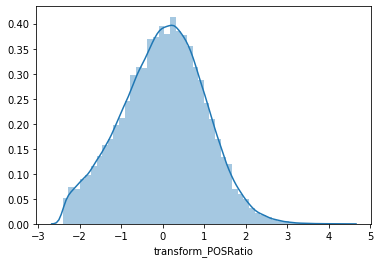

In [40]:
sn.distplot(df_out['transform_POSRatio'])

In [41]:
df_out['transform_POSRatio'].skew()

-0.04879812066205868

## 6. SpamHitScore

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is -0.12 which falls in normal range i.e. -0.5 to 0.5

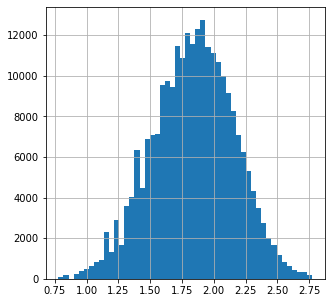

In [42]:
df_out['SpamHitScore'].hist(figsize=(5,5),bins=50)

In [43]:
df_out['SpamHitScore'].skew()

-0.12460735928948308

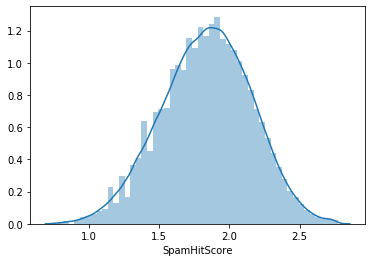

In [44]:
sn.distplot(df_out['SpamHitScore'])

## 7. User Tenure

### Data is not symmetrical for this feature with log transformation and outlier removal itself. Initial skew value is -1.23 which is highly negatively skewed. First we perform normalization of data using Min-max scaler and then perform quantile transformation on that. We can see the resultant skew value is -0.05 which falls in normal range i.e. -0.5 to 0.5. Hence the data is normal now

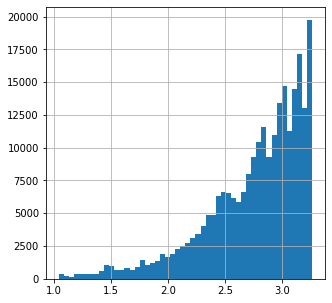

In [45]:
df_out['User Tenure'].hist(figsize=(5,5),bins=50)

In [46]:
df_out['User Tenure'].skew()

-1.2324697250966008

In [47]:
scale = MinMaxScaler()
user = scale.fit(df_out[['User Tenure']])
user_scaled = user.transform(df_out[['User Tenure']])

In [48]:
norm_user = qt.fit_transform(user_scaled.reshape(-1, 1))

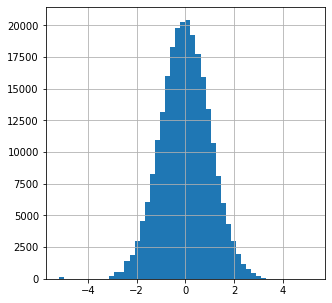

In [49]:
df_out['transform_UserTenure'] = norm_user
df_out['transform_UserTenure'].hist(figsize=(5,5),bins=50)

In [50]:
df_out['transform_UserTenure'].skew()

-0.059325838720316236

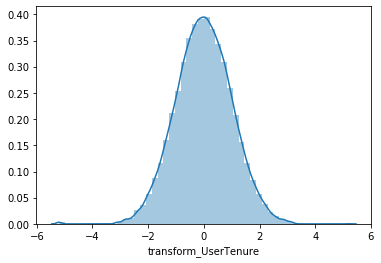

In [51]:
sn.distplot(df_out['transform_UserTenure'])

## 8. Time of Review

### Data is not symmetrical for this feature with log transformation and outlier removal only. Initial skew value is -0.67 which is negatively skewed. First we perform normalization of data using Min-max scaler and then perform power transformation on that. We can see the resultant skew value is -0.09 which falls in normal range i.e. -0.5 to 0.5. Hence the data is normal now

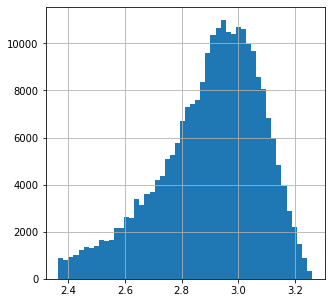

In [52]:
df_out['Time of Review'].hist(figsize=(5,5),bins=50)

In [53]:
df_out['Time of Review'].skew()

-0.6700226425056881

In [54]:
scale = MinMaxScaler()
time = scale.fit(df_out[['Time of Review']])
time_scaled = time.transform(df_out[['Time of Review']])

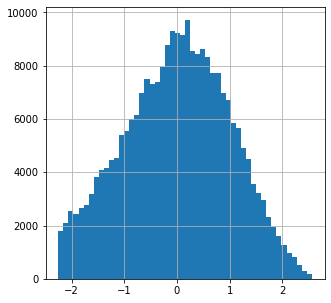

In [55]:
sqrt_transformed3 = power_transform(time_scaled, method='yeo-johnson')
df_out['transform_timeofreview'] = sqrt_transformed3
df_out['transform_timeofreview'].hist(figsize=(5,5),bins=50)

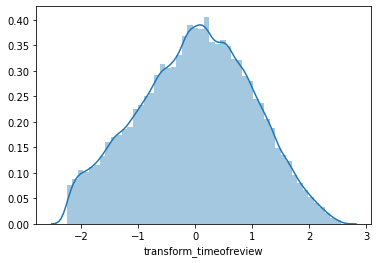

In [56]:
sn.distplot(df_out['transform_timeofreview'])

In [57]:
df_out['transform_timeofreview'].skew()

-0.09277254605097235

## 9. Rating Deviation

### Data is symmetrical for this feature with log transformation and outlier removal itself. We need not process it further. We can see the skew value is -0.09 which falls in normal range i.e. -0.5 to 0.5

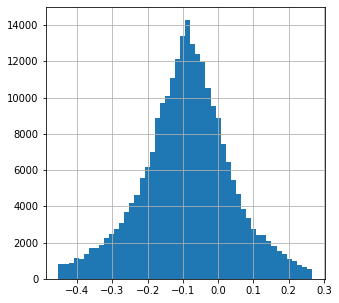

In [58]:
df_out['Rating Deviation'].hist(figsize=(5,5),bins=50)

In [59]:
df_out['Rating Deviation'].skew()

-0.09692398871742695

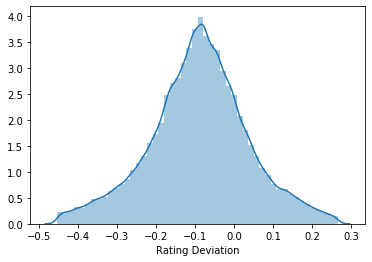

In [60]:
sn.distplot(df_out['Rating Deviation'])

## 10. Rating Entropy

### Data is not symmetrical for this feature with log transformation and outlier removal only. Initial skew value is -0.77 which is negatively skewed. First we perform normalization of data using Min-max scaler and then perform quantile transformation on that. We can see the resultant skew value is 0.07 which falls in normal range i.e. -0.5 to 0.5. Hence the data is normal now

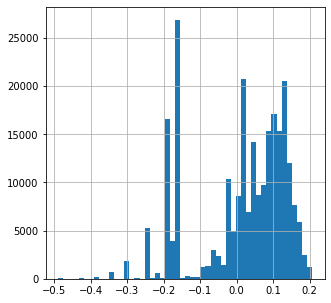

In [61]:
df_out['Rating Entropy'].hist(figsize=(5,5),bins=50)

In [62]:
df_out['Rating Entropy'].skew()

-0.7767647365236354

In [63]:
scale = MinMaxScaler()
entropy = scale.fit(df_out[['Rating Entropy']])
entropy_scaled = entropy.transform(df_out[['Rating Entropy']])

In [64]:
norm_entropy = qt.fit_transform(entropy_scaled.reshape(-1, 1))

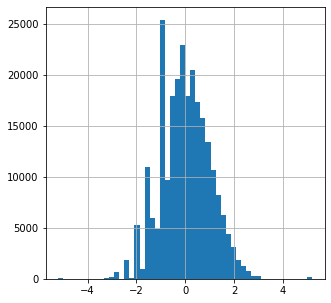

In [65]:
df_out['transform_ent'] = norm_entropy
df_out['transform_ent'].hist(figsize=(5,5),bins=50)

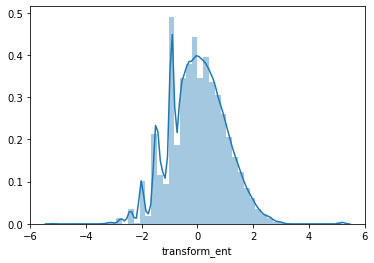

In [66]:
sn.distplot(df_out['transform_ent'])

In [67]:
df_out['transform_ent'].skew()

0.08438128356233571

## 11. Sentiment Score

### Data is not symmetrical for this feature with outlier removal only. We did not perform log transformation on this feature. Initial skew value is -0.74 which is negatively skewed. In this, we perform Multi-phase power transformation on data. We can see the resultant skew value is 0.006 which falls in normal range i.e. -0.5 to 0.5. Hence the data is normal now though not gaussian like view visually.

In [68]:
arr_1 = df_out["Sentiment Score"].tolist()

In [69]:
print("orignal skewness ::::",df_out["Sentiment Score"].skew())

orignal skewness :::: -0.7458804147502304


In [70]:
df_out["box"] = boxcox(arr_1,lmbda=boxcox_normmax(arr_1))
df_out["box"].skew()

-0.17697658528155344

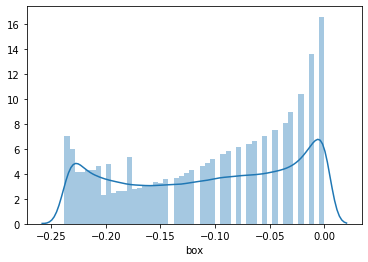

In [71]:
sn.distplot(df_out["box"])

In [72]:
df_out["yeo"] = yeojohnson(arr_1,lmbda=yeojohnson_normmax(arr_1))
df_out["yeo"].skew()

-0.24809384946204216

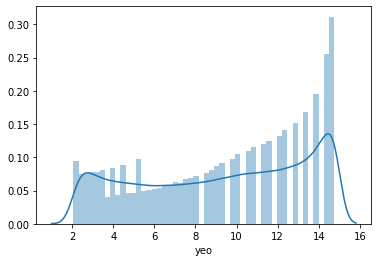

In [73]:
sn.distplot(df_out["yeo"])

In [74]:
df_out["yeobox"] = yeojohnson(df_out.box,lmbda=yeojohnson_normmax(df_out.box))
df_out.yeobox.skew()

-0.03450367245945811

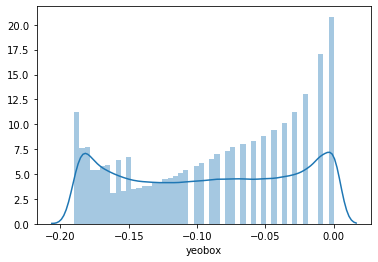

In [75]:
sn.distplot(df_out.yeobox)

In [76]:
df_out["sentimentScore"] = yeojohnson(df_out.yeobox,lmbda=yeojohnson_normmax(df_out.yeobox))
df_out.sentimentScore.skew()

0.006541624189828976

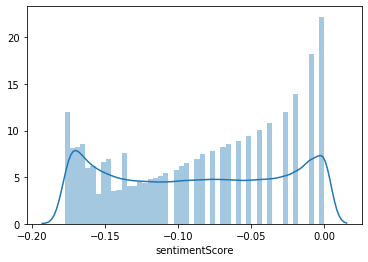

In [77]:
sn.distplot(df_out.sentimentScore)

## 12. Review Count

### Data is not symmetrical for this feature with log transformation and outlier removal itself. Initial skew value is 0.28 which is ideally in normal range. But we perform one step power transformation for a better shape curve. We can see the resultant skew value is 0.03 which falls in normal range i.e. -0.5 to 0.5. The data is normal now though not gaussian like visually.

In [78]:
arr_2 = df_out["Review Count"].tolist()

In [79]:
print("orignal skewness ::::",df_out["Review Count"].skew())

orignal skewness :::: 0.28779074967537105


In [80]:
df_out["reviewcount"] = boxcox(arr_2,lmbda=boxcox_normmax(arr_2))
df_out["reviewcount"].skew()

0.030209822060145566

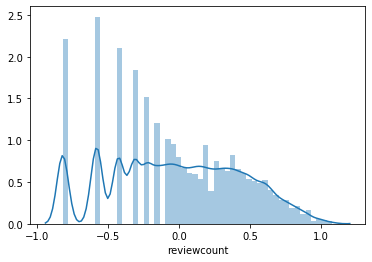

In [81]:
sn.distplot(df_out["reviewcount"])

## Final dataframe for processing 

In [82]:
# df_final dataframe we created in the beginning of the code
df_final['Label'] = df['Label'] # df is our original dataframe where we loaded the initial data
df_final['Word Density'] = df_out['Word Density']

In [83]:
df_final['Review Length(No. of Words)'] = df_out['Review Length(No. of Words)']
df_final['Ratio of Positive Words'] = df_out['Ratio of Positive Words']
df_final['transform_POSRatio'] = df_out['transform_POSRatio']
df_final['SpamHitScore'] = df_out['SpamHitScore']
df_final['sentimentScore'] = df_out['sentimentScore']
df_final['Review Gap'] = df_out['Review Gap']
df_final['transform_UserTenure'] = df_out['transform_UserTenure']
df_final['transform_timeofreview'] = df_out['transform_timeofreview']
df_final['Rating Deviation'] = df_out['Rating Deviation']
df_final['reviewcount'] = df_out['reviewcount']
df_final['transform_ent'] = df_out['transform_ent']

In [84]:
df_final.head()

,Label,Word Density,Review Length(No. of Words),Ratio of Positive Words,transform_POSRatio,SpamHitScore,sentimentScore,Review Gap,transform_UserTenure,transform_timeofreview,Rating Deviation,reviewcount,transform_ent
0,-1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.733255,2.445604,-1.902314,0.044835,2.255273,-0.148570,1.021189,-2.408550,1.657253,-0.014201,-0.581962,-0.012546
2,1,0.736475,2.181844,-1.882240,-0.220188,2.008600,-0.141178,1.223088,-1.425011,0.342969,0.002182,-0.098493,0.816150
3,1,0.730195,2.340444,-1.797366,0.638671,2.096910,-0.162075,1.690196,-0.933910,-0.379617,-0.070932,-0.230678,0.422483
4,1,0.712798,2.130334,-1.653213,0.331552,1.869232,-0.160426,1.568202,-0.676854,1.446749,0.062202,0.000000,-0.723343


### Because we added Label column from df i.e. undisturbed data, therefore we have null values which we are removing in next step

In [85]:
df_final.isnull()

,Label,Word Density,Review Length(No. of Words),Ratio of Positive Words,transform_POSRatio,SpamHitScore,sentimentScore,Review Gap,transform_UserTenure,transform_timeofreview,Rating Deviation,reviewcount,transform_ent
0,False,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384141,False,False,False,False,False,False,False,False,False,False,False,False,False
384142,False,True,True,True,True,True,True,True,True,True,True,True,True
384143,False,False,False,False,False,False,False,False,False,False,False,False,False
384144,False,True,True,True,True,True,True,True,True,True,True,True,True


In [86]:
df_final.dropna()

,Label,Word Density,Review Length(No. of Words),Ratio of Positive Words,transform_POSRatio,SpamHitScore,sentimentScore,Review Gap,transform_UserTenure,transform_timeofreview,Rating Deviation,reviewcount,transform_ent
1,1,0.733255,2.445604,-1.902314,0.044835,2.255273,-0.148570,1.021189,-2.408550,1.657253,-0.014201,-0.581962,-0.012546
2,1,0.736475,2.181844,-1.882240,-0.220188,2.008600,-0.141178,1.223088,-1.425011,0.342969,0.002182,-0.098493,0.816150
3,1,0.730195,2.340444,-1.797366,0.638671,2.096910,-0.162075,1.690196,-0.933910,-0.379617,-0.070932,-0.230678,0.422483
4,1,0.712798,2.130334,-1.653213,0.331552,1.869232,-0.160426,1.568202,-0.676854,1.446749,0.062202,0.000000,-0.723343
8,1,0.746787,2.082785,-1.686636,-0.963758,1.875061,-0.076845,0.879860,-0.602943,1.171466,-0.079556,0.630277,0.560082
...,...,...,...,...,...,...,...,...,...,...,...,...,...
384129,1,0.723188,2.444045,-1.900757,0.224376,2.230449,-0.115252,1.094146,2.408550,-0.915412,-0.106902,1.014427,0.597770
384132,1,0.732924,1.954243,-1.558709,0.560113,1.806180,-0.135611,2.562590,1.074090,-0.915691,-0.241227,-0.318007,-1.215372
384136,1,0.750123,1.740363,-1.744293,-1.212193,1.556303,-0.097954,2.505693,1.310017,-0.079274,-0.453025,-0.230678,-1.482760
384141,1,0.714210,2.348305,-2.349278,0.754119,2.096910,-0.027579,2.027905,0.600336,0.384158,-0.098250,0.078204,-0.680013


In [87]:
df_final.to_csv("procData_Ajay2.csv", index=False)

## Correlation Matrix

### We use heatmap to study the correlation between features where the darker the blue(towards +1), the stronger is the correlation and the darker the red, the weaker the correlation (towards -1). Apart of the main diagnol, we can observe that 'SpamHitScore' and 'Review Length(No. of words)' are in strong positive correlation i.e have similar impact whereas 'Review Count' and 'Review Gap' have strong negative correlation i.e. have repelling impact. 
#### There surely are other weaker correlations but above mentioned mark the attention of correlation result.

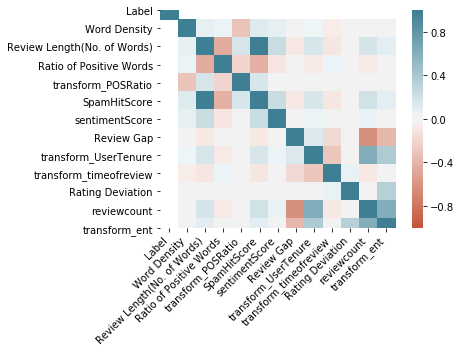

In [153]:
#plot correlation
corrMatrix = df_final.corr()

ax = sn.heatmap(
    corrMatrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sn.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);